# FEISTY test cases

The `testcase` module provides some utilites to generate domain and forcing data
for a handful of `feisty` test cases.

Here we illustrate some of these utilties.


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

import feisty

## Idealized bathymetry


In [3]:
domain_dict = feisty.testcase.domain_tanh_shelf(nx=22)
domain_dict

{'bathymetry': <xarray.DataArray 'bathymetry' (X: 22)>
 array([  30.04108171,   30.19902725,   31.17873201,   36.8321355 ,
          61.34734988,  131.85502453,  264.42098685,  437.55383604,
         609.22301965,  749.85055796,  851.52743149,  919.48569869,
         962.76570279,  989.53462509, 1005.8032774 , 1015.58739719,
        1021.43508524, 1024.91716307, 1026.98605941, 1028.21370613,
        1028.94160815, 1029.37300191])
 Coordinates:
   * X        (X) float64 -0.5 -0.2381 0.02381 0.2857 ... 4.214 4.476 4.738 5.0
 Attributes:
     long_name:  depth
     units:      m,
 'NX': 22}

Text(0.5, 1.0, 'Bathymetry')

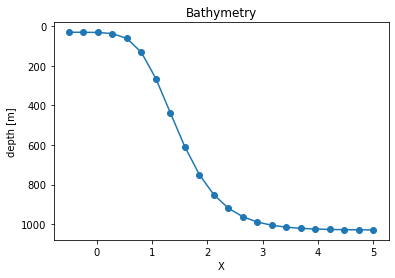

In [4]:
domain_dict["bathymetry"].plot(marker="o")
plt.gca().invert_yaxis()
plt.title("Bathymetry")

## Idealized forcing data

The `testcase` subpackage of `feisty` includes a utilty to generate idealized
forcing representing an annual cycle using harmonic function.

Here is an example dataset returned:


In [5]:
forcing = feisty.testcase.forcing_cyclic(domain_dict)
forcing.info()

xarray.Dataset {
dimensions:
	time = 366 ;
	X = 22 ;
	zooplankton = 1 ;

variables:
	float64 time(time) ;
	float64 X(X) ;
	float64 T_pelagic(time, X) ;
		T_pelagic:long_name = T_pelagic ;
		T_pelagic:units = degC ;
	float64 T_bottom(time, X) ;
		T_bottom:long_name = T_bottom ;
		T_bottom:units = degC ;
	float64 poc_flux_bottom(time, X) ;
		poc_flux_bottom:long_name = POC flux ;
		poc_flux_bottom:units = g/m^2/d ;
		poc_flux_bottom:b = 0.7 ;
	<U3 zooplankton(zooplankton) ;
	float64 zooC(zooplankton, time, X) ;
		zooC:long_name = Zooplankton biomass ;
		zooC:units = g/m^2 ;
		zooC:harmonic_parms = Zoo = {'mu': 4.0, 'amp_fraction': 0.2, 'phase': 10.0} ;
	float64 zoo_mort(zooplankton, time, X) ;
		zoo_mort:long_name = Zooplankton quadratic mortality ;
		zoo_mort:units = g/m^2/d ;

// global attributes:
	:note = Idealized cyclic forcing for FEISTY model. ;
}

### Visualizing forcing data

The temperature field looks like this:


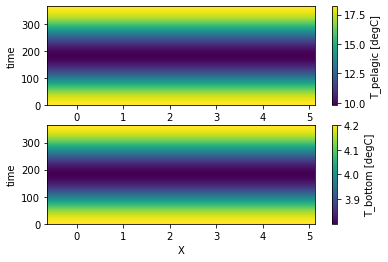

In [6]:
fig, axs = plt.subplots(nrows=2)
forcing.T_pelagic.plot(ax=axs[0])
forcing.T_bottom.plot(ax=axs[1])

Or at a single `X` point:


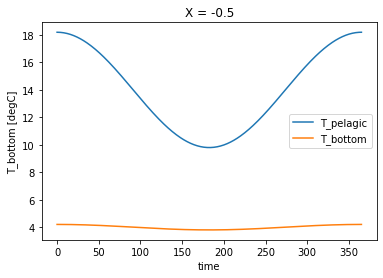

In [7]:
forcing.T_pelagic.isel(X=0).plot(label="T_pelagic")
forcing.T_bottom.isel(X=0).plot(label="T_bottom")
plt.legend()

Zooplankton and POC flux


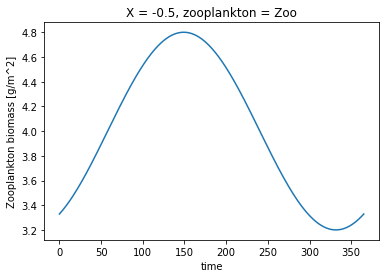

In [8]:
zoo = forcing.zooC
for i in range(zoo.zooplankton.shape[0]):
    plt.figure()
    zoo.isel(X=0, zooplankton=i).plot()

Zooplankton mortality


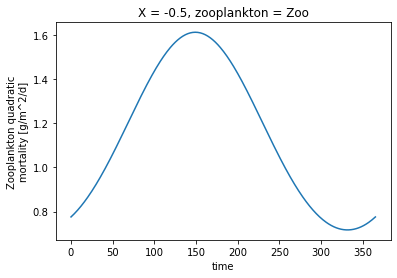

In [9]:
zoo = forcing.zoo_mort
for i in range(zoo.zooplankton.shape[0]):
    plt.figure()
    zoo.isel(X=0, zooplankton=i).plot()

POC flux


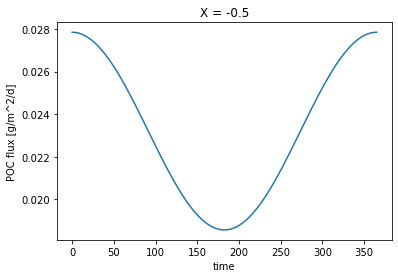

In [10]:
forcing.poc_flux_bottom.isel(X=0).plot()